In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
recipe = pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 2/RAW_recipes.csv")
recipe.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
recipe = recipe[recipe['minutes']<=20]

In [5]:
recipe.shape

(61846, 12)

In [6]:
unique_recipes = recipe['id'].unique()

In [7]:
RAW_interactions = pd.read_csv("/content/drive/MyDrive/RS Data/Assignment 2/RAW_interactions.csv")
RAW_interactions.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [8]:
RAW_interactions.shape

(1132367, 5)

In [9]:
len(RAW_interactions["user_id"].unique())

226570

In [10]:
len(RAW_interactions["recipe_id"].unique())

231637

In [11]:
df= RAW_interactions.copy()

### Keeping only those rows having Recipe which can be made in 20 min 

In [12]:
df = df.loc[df['recipe_id'].isin(unique_recipes)]

In [13]:
df = df.groupby(by=['user_id','recipe_id'], as_index=False).agg({"rating":"mean"})
df.shape

(283696, 3)

In [14]:
df.describe()

,user_id,recipe_id,rating
count,2.836960e+05,283696.000000,283696.000000
mean,1.174843e+08,174890.033525,4.464353
std,4.649855e+08,132455.248758,1.205835
min,1.533000e+03,52.000000,0.000000
25%,1.291770e+05,63586.000000,4.000000
50%,3.055310e+05,141053.000000,5.000000
75%,6.734440e+05,269020.000000,5.000000
max,2.002373e+09,537459.000000,5.000000


#### Keeping only those users who've atleast given 15 ratings.

In [15]:
freq = df['user_id'].value_counts()
threshold = 15
mask = df['user_id'].isin(freq[freq >= threshold].index)
df = df.loc[mask]

In [16]:
df.shape

(170315, 3)

In [17]:
df.describe()

,user_id,recipe_id,rating
count,1.703150e+05,170315.000000,170315.000000
mean,4.730194e+06,194373.787412,4.652967
std,9.205389e+07,134147.485653,0.833009
min,1.533000e+03,52.000000,0.000000
25%,9.300600e+04,79644.000000,5.000000
50%,2.097470e+05,171020.000000,5.000000
75%,4.246800e+05,294340.000000,5.000000
max,2.001453e+09,537459.000000,5.000000


In [18]:
len(df["user_id"].unique())

2225

In [19]:
len(df["recipe_id"].unique())

52170

### Creating sparse Rating Matrix

In [20]:
unique_users = df['user_id'].unique() 
unique_recipes = df['recipe_id'].unique()

In [21]:
users_dict = {unique_users[i] : i for i in range(len(unique_users))}
recipes_dict = {unique_recipes[i] : i for i in range(len(unique_recipes))}

In [22]:
df['user_id'] = df['user_id'].map(users_dict)
df['recipe_id'] = df['recipe_id'].map(recipes_dict)

<ipython-input-22-e88f2b47698f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].map(users_dict)
<ipython-input-22-e88f2b47698f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recipe_id'] = df['recipe_id'].map(recipes_dict)


In [23]:
df.head()

,user_id,recipe_id,rating
0,0,0,5.0
1,0,1,5.0
2,0,2,5.0
3,0,3,5.0
4,0,4,5.0


In [24]:
import pandas as pd
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

rating_matrix_coo = coo_matrix((df['rating'],(df['user_id'],df['recipe_id'])))
rating_matrix_csr = csr_matrix(rating_matrix_coo)
rating_matrix = rating_matrix_coo.toarray()
rating_matrix.shape

(2225, 52170)

In [25]:
rating_matrix

array([[5., 5., 5., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 5., 5., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
np.save('rating_matrix_coo.npy', rating_matrix_coo)

In [27]:
rating_matrix.shape
np.save('rating_matrix.npy', rating_matrix)

In [28]:
rating_matrix

array([[5., 5., 5., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 5., 5., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Applying KNN Model

In [29]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(metric='cosine', algorithm='brute',n_neighbors=100)
knn_model.fit(rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=100)

In [30]:
distances, indices = knn_model.kneighbors(rating_matrix, n_neighbors=101)

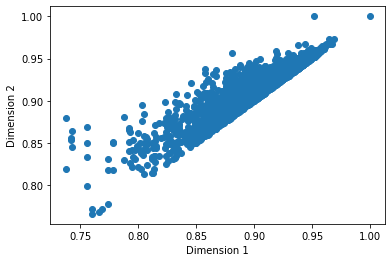

In [31]:
import matplotlib.pyplot as plt

embedding = distances[:, 1:]

# Plot the embedding as a scatter plot
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [32]:
indices

array([[   0, 1364, 1008, ...,  373, 2049,  290],
       [   1,  896,  711, ..., 1127, 1484, 1632],
       [   2, 1939, 1638, ...,    9,   98, 1577],
       ...,
       [2222,  929,  772, ..., 1813,  791, 1370],
       [2223, 1605,  868, ..., 1122, 1795, 1026],
       [2224, 1854, 1127, ..., 1504, 1498, 1435]])

### Finding Neighbours

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(rating_matrix, dense_output=False)

In [34]:
top_similar = np.zeros((similarity_matrix.shape[0], 101))

# iterate over each row in the similarity matrix
for i in range(similarity_matrix.shape[0]):
    # get the indices that would sort the row in descending order
    sorted_indices = np.argsort(-similarity_matrix[i])
    # take the first 101 indices, which correspond to the most similar rows
    top_indices = sorted_indices[:101]
    # add the top indices to the 'top_similar' matrix
    top_similar[i] = top_indices

# print the resulting matrix
print(top_similar)

[[0.000e+00 1.364e+03 1.008e+03 ... 3.730e+02 2.049e+03 2.900e+02]
 [1.000e+00 8.960e+02 7.110e+02 ... 1.127e+03 1.484e+03 1.632e+03]
 [2.000e+00 1.939e+03 1.638e+03 ... 9.000e+00 9.800e+01 1.577e+03]
 ...
 [2.222e+03 9.290e+02 7.720e+02 ... 1.813e+03 7.910e+02 1.370e+03]
 [2.223e+03 1.605e+03 8.680e+02 ... 3.550e+02 1.795e+03 2.191e+03]
 [2.224e+03 1.854e+03 1.127e+03 ... 1.652e+03 1.489e+03 1.466e+03]]


### Filling missing values

For User 0

In [35]:
distance_list = distances[0]

In [36]:
weightage_list = (1/distance_list) 
weightage_list[0] = 0
weightage_list = weightage_list/ np.sum(weightage_list)
weightage_list

<ipython-input-36-24d42580e17a>:1: RuntimeWarning: divide by zero encountered in true_divide
  weightage_list = (1/distance_list)


array([0.        , 0.01078207, 0.01025386, 0.01025197, 0.01023571,
       0.01021673, 0.01021517, 0.01020311, 0.01018908, 0.01018706,
       0.01018115, 0.01017987, 0.01017544, 0.01016221, 0.01016164,
       0.01016049, 0.01016049, 0.0101457 , 0.0101431 , 0.01013654,
       0.01013445, 0.0101144 , 0.01011017, 0.01010124, 0.01008915,
       0.01008249, 0.01007666, 0.01006923, 0.01006923, 0.01006218,
       0.01005893, 0.01005046, 0.01004991, 0.01004276, 0.01004173,
       0.0100377 , 0.01003647, 0.01003428, 0.01003167, 0.01002322,
       0.01000831, 0.01000557, 0.00999836, 0.00999808, 0.00999808,
       0.00998748, 0.0099874 , 0.00998592, 0.00996939, 0.00996648,
       0.0099649 , 0.00996334, 0.00995978, 0.00995906, 0.00995326,
       0.00994811, 0.00994433, 0.00994412, 0.00994182, 0.00993817,
       0.00993802, 0.0099372 , 0.00993251, 0.00992779, 0.00992458,
       0.00992449, 0.00992356, 0.00992255, 0.00992127, 0.00990285,
       0.00989731, 0.00989603, 0.00989526, 0.00989525, 0.00989

In [37]:
similar_users_ratings = rating_matrix[indices[0]]
similar_users_ratings.shape

(101, 52170)

In [38]:
np.count_nonzero(similar_users_ratings[0])

24

In [39]:
for i in range(similar_users_ratings.shape[1]):
  if similar_users_ratings[0,i] == 0 and similar_users_ratings[:,i].any !=0:
    temp = []
    for j in range(similar_users_ratings.shape[0]):
      if similar_users_ratings[j,i] != 0:
        temp.append(j)
    if(len(temp)>0):
      dist_list = distances[0,temp]
      weigh_list = (1/dist_list) 
      weigh_list = weigh_list/ np.sum(weigh_list)
      weigh_list = np.array(weigh_list)

      r = weigh_list*similar_users_ratings[temp,i]
      similar_users_ratings[0][i] = r.sum()
      rating_matrix[0,i] = similar_users_ratings[0][i]